# Ablation Study

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib
import warnings
import re
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
cvis_4bench = ['sil','dbs','ari']

features_4bench = ['attr_conc.mean','attr_conc.sd','attr_ent.mean',
    'attr_ent.sd','attr_to_inst','cohesiveness.mean','cohesiveness.sd',
    #'cor.mean',#'cor.sd',
    'cov.mean',#'cov.sd',
    'eigenvalues.mean','eigenvalues.sd',
    'inst_to_attr','iq_range.mean','iq_range.sd',
    #'kurtosis.mean','kurtosis.sd',
    'mad.mean','mad.sd',
    #'max.mean','max.sd','mean.mean','mean.sd',
    'median.mean',
    'median.sd',#'min.mean','min.sd',
    'nr_attr','nr_cor_attr','nr_inst','one_itemset.mean',
    'one_itemset.sd',
    #'range.mean','range.sd',
    'sd.mean','sd.sd'
    #,'skewness.mean', 'skewness.sd'
    ,'sparsity.mean','sparsity.sd','t2','t3','t4','t_mean.mean',
    't_mean.sd','two_itemset.mean','two_itemset.sd','var.mean','var.sd',
    'wg_dist.mean','wg_dist.sd',
    'sil', 'dbs', 'ari'
]

In [2]:
def parse_input_string(input_string):
    # Define a more flexible regex pattern
    pattern = re.compile(r'dim(\d+)-clusters(\d+)-instances(\d+)-overlap([\deE.+-]+)-([\deE.+-]+)-aspectref([\deE.+-]+)-aspectmaxmin([\deE.+-]+)-radius(\d+)-imbalance(\d+)-rep(\d+)')

    # Match the pattern in the input string
    match = pattern.match(input_string)

    if match:
        # Extract matched groups
        dim, clusters, instances, overlap_min, overlap_max, aspect_ref, aspect_max_min, radius, imbalance, rep = match.groups()

        # Convert string values to appropriate data types
        dim = int(dim)
        clusters = int(clusters)
        instances = int(instances)
        overlap_min = overlap_min
        overlap_max = float(overlap_max)
        aspect_ref = float(aspect_ref)
        aspect_max_min = float(aspect_max_min)
        radius = int(radius)
        imbalance = int(imbalance)
        rep = int(rep)

        # Create a dictionary to store the parsed values
        parsed_values = {
            'dim': dim,
            'clusters': clusters,
            'instances': instances,
            'overlap_min': overlap_min,
            'overlap_max': overlap_max,
            'aspect_ref': aspect_ref,
            'aspect_max_min': aspect_max_min,
            'radius': radius,
            'imbalance': imbalance,
            'rep': rep
        }

        return parsed_values
    else:
        print("Input string does not match the expected format.")
        return None

In [3]:
rf_regressor = joblib.load(f"sv6.joblib")

In [15]:
rf_regressor_cvi = joblib.load(f"cvi_sv6.joblib")

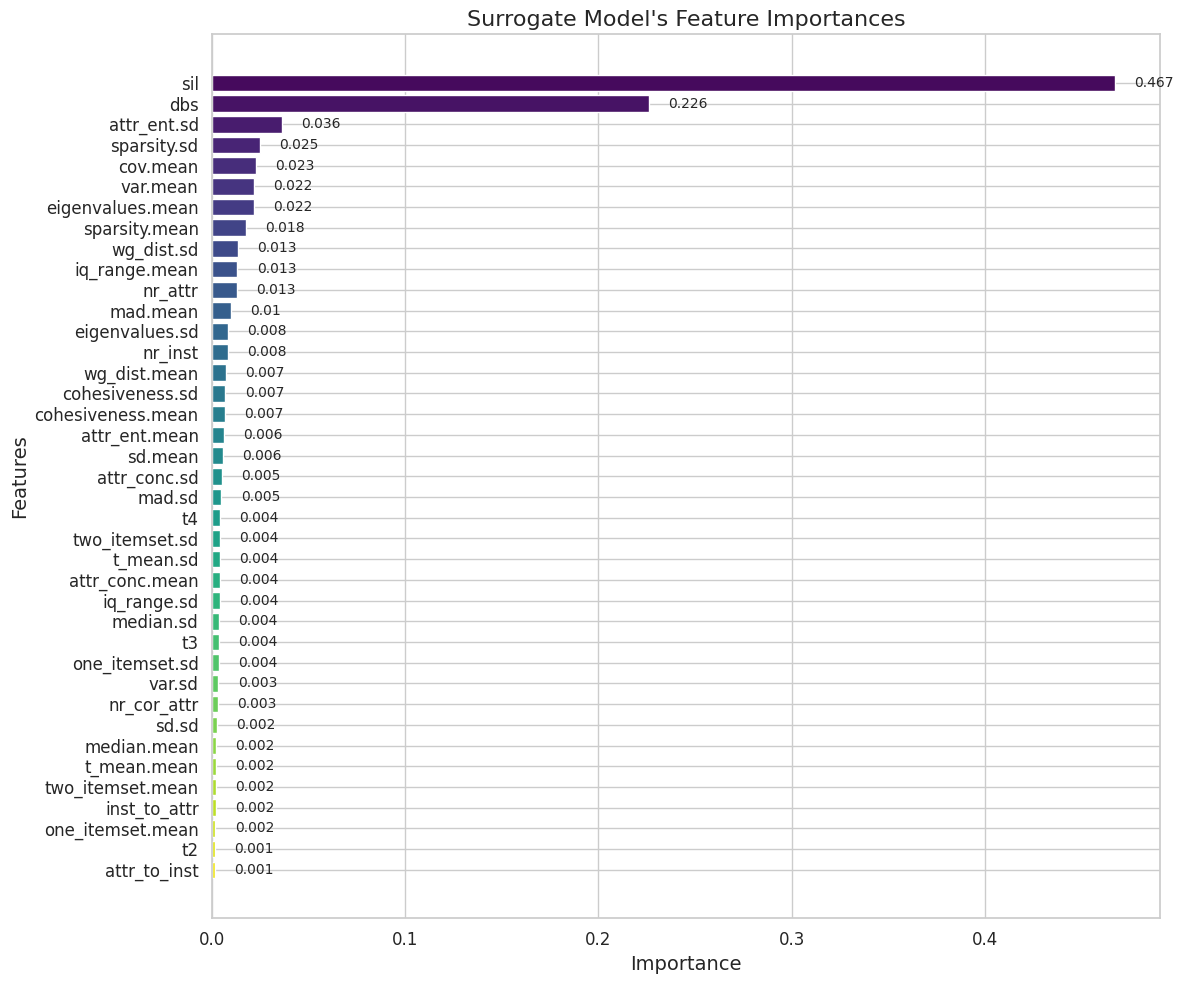

In [16]:
# Ensure the model is a Random Forest
if hasattr(rf_regressor, 'feature_importances_'):
    # Calculate feature importances
    feature_importances = rf_regressor.feature_importances_

    # Get the indices of the features sorted by importance
    indices = np.argsort(feature_importances)[::-1]

    # Sort feature names by their importance
    sorted_feature_names = [features_4bench[i] for i in indices]

    # Use Seaborn for a better aesthetic
    sns.set(style="whitegrid")

    # Create a color palette
    palette = sns.color_palette("viridis", len(feature_importances))

    # Plot the feature importances as horizontal bars
    plt.figure(figsize=(12, 10))
    bars = plt.barh(range(len(feature_importances)), feature_importances[indices], color=palette, align='center')

    # Add labels to the bars
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, round(bar.get_width(), 3), 
                 va='center', ha='left', fontsize=10)

    # Customize plot details
    plt.title('Surrogate Model\'s Feature Importances', fontsize=16)
    plt.yticks(range(len(feature_importances)), sorted_feature_names, fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Features', fontsize=14)
    plt.xlabel('Importance', fontsize=14)
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    plt.show()

else:
    print("The loaded model does not have feature importances.")

---

# Synthetic Data

In [17]:
consolidated_pipelines = pd.read_csv(f"data/consolidated_pipelines.csv")
validation_pipelines = consolidated_pipelines[(consolidated_pipelines.Tags == '["0_Biagio"]') | (consolidated_pipelines.Tags == '["2_ML2DAC"]')].reset_index(drop=True)

validation_df = pd.read_csv(f"data/validation_benchmark.csv")
mfs = validation_df.drop_duplicates(subset='file_name', keep='first')
mfs = mfs.drop(['algorithm','sil','dbs','ari','cluster_diff','predicted_cluster','clusters'], axis=1).reset_index(drop=True)
mfs = mfs.rename(columns={'file_name':'dataset'})
validation_pipelines_ = validation_pipelines.copy()
validation_pipelines_ = validation_pipelines_.merge(mfs, on='dataset')
validation_pipelines_ = validation_pipelines_.drop(['filename','surrogate_score'], axis=1)

In [18]:
validation_pipelines_

,dataset,timestamp,gen,k,sil,dbs,ari,pipeline,_id,Tags,...,t3,t4,t_mean.mean,t_mean.sd,two_itemset.mean,two_itemset.sd,var.mean,var.sd,wg_dist.mean,wg_dist.sd
0,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286548817,0,21,0.2827,1.3650,0.7076,"Pipeline(steps=[('pca', PCA(n_components=10)),...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.045,0.818182,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456
1,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286548920,0,22,0.2343,1.2424,0.6912,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.045,0.818182,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456
2,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549019,0,8,0.3273,1.2346,0.7488,"Pipeline(steps=[('kmeans', KMeans())])",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.045,0.818182,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456
3,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549078,0,11,0.3448,1.2526,0.8947,"Pipeline(steps=[('agglomerativeclustering', Ag...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.045,0.818182,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456
4,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549194,0,21,0.2675,1.1927,0.6878,"Pipeline(steps=[('normalizer', Normalizer(norm...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.045,0.818182,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432699,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803193,1,11,0.4490,1.0413,0.8145,"Pipeline(steps=[('minmaxscaler', MinMaxScaler(...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.020,0.727273,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954
432700,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803468,1,20,0.2116,1.7458,0.6701,"Pipeline(steps=[('spectralclustering', Spectra...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.020,0.727273,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954
432701,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803550,1,9,0.3147,1.4184,0.5533,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.020,0.727273,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954
432702,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803697,1,20,0.3210,1.5789,0.7876,"Pipeline(steps=[('kmeans', KMeans(n_clusters=2...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.020,0.727273,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954


In [19]:
# mudei o SURROGATE SCORE -> agora ele maximiza

validation_data = validation_pipelines_.copy()

surrogate_data = validation_data[features_4bench]
surrogate_cvi_data = validation_data[cvis_4bench]
# full poac surrogate
X_test, y_test = surrogate_data.values[:, :-1], surrogate_data.values[:, -1]
validation_data['surrogate_score'] = rf_regressor.predict(X_test)

# surrogate cvi
X_test, y_test = surrogate_cvi_data.values[:, :-1], surrogate_cvi_data.values[:, -1]
validation_data['surrogate_CVI'] = rf_regressor_cvi.predict(X_test)

In [20]:
validation_data

,dataset,timestamp,gen,k,sil,dbs,ari,pipeline,_id,Tags,...,t_mean.mean,t_mean.sd,two_itemset.mean,two_itemset.sd,var.mean,var.sd,wg_dist.mean,wg_dist.sd,surrogate_score,surrogate_CVI
0,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286548817,0,21,0.2827,1.3650,0.7076,"Pipeline(steps=[('pca', PCA(n_components=10)),...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456,0.8685,0.889772
1,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286548920,0,22,0.2343,1.2424,0.6912,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456,0.8720,0.928223
2,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549019,0,8,0.3273,1.2346,0.7488,"Pipeline(steps=[('kmeans', KMeans())])",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456,0.9158,0.837954
3,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549078,0,11,0.3448,1.2526,0.8947,"Pipeline(steps=[('agglomerativeclustering', Ag...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456,0.9153,0.730558
4,dim11-clusters10-instances200-overlap1e-06-1e-...,1701286549194,0,21,0.2675,1.1927,0.6878,"Pipeline(steps=[('normalizer', Normalizer(norm...",655cdb166cb05f082e11de6e,"[""0_Biagio""]",...,0.449590,0.074444,0.320000,0.043884,0.040120,0.011757,0.834401,0.121456,0.8801,0.862090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432699,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803193,1,11,0.4490,1.0413,0.8145,"Pipeline(steps=[('minmaxscaler', MinMaxScaler(...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954,0.9618,0.947900
432700,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803468,1,20,0.2116,1.7458,0.6701,"Pipeline(steps=[('spectralclustering', Spectra...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954,0.7367,0.764857
432701,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803550,1,9,0.3147,1.4184,0.5533,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954,0.8619,0.862500
432702,dim11-clusters12-instances400-overlap1e-06-1e-...,1701293803697,1,20,0.3210,1.5789,0.7876,"Pipeline(steps=[('kmeans', KMeans(n_clusters=2...",655cdb166cb05f082e11de7c,"[""0_Biagio""]",...,0.549003,0.092091,0.244898,0.030186,0.040924,0.008839,0.814986,0.151954,0.8542,0.962733


In [13]:
validation_data_ = validation_data.copy()
max_scores = validation_data_.loc[validation_data_.groupby('dataset')['surrogate_score'].transform(max) == validation_data_['surrogate_score']]
print(f"Mean per dataset: {max_scores.groupby('dataset').agg({'ari':['mean','median','std','count']})['ari']['mean'].mean()}")
print(f"Mean SIL per dataset: {max_scores.groupby('dataset').agg({'sil':['mean','median','std','count']})['sil']['mean'].mean()}")
print(f"Mean DBS per dataset: {max_scores.groupby('dataset').agg({'dbs':['mean','median','std','count']})['dbs']['mean'].mean()}")

Mean per dataset: 0.7062109876919841
Mean SIL per dataset: 0.5423124111559812
Mean DBS per dataset: 0.7625700650184367


In [21]:
validation_data_ = validation_data.copy()
max_scores = validation_data_.loc[validation_data_.groupby('dataset')['surrogate_CVI'].transform(max) == validation_data_['surrogate_CVI']]
print(f"Mean per dataset: {max_scores.groupby('dataset').agg({'ari':['mean','median','std','count']})['ari']['mean'].mean()}")
print(f"Mean SIL per dataset: {max_scores.groupby('dataset').agg({'sil':['mean','median','std','count']})['sil']['mean'].mean()}")
print(f"Mean DBS per dataset: {max_scores.groupby('dataset').agg({'dbs':['mean','median','std','count']})['dbs']['mean'].mean()}")

Mean per dataset: 0.5703507581146378
Mean SIL per dataset: 0.5425404048840039
Mean DBS per dataset: 0.6851317606256393


In [43]:
# consolidated_pipelines = pd.read_csv("data/consolidated_pipelines.csv")
consolidated_pipelines_ = validation_data.copy()

# TODO - alterar a selection para pegar os n top pipelines por dataset de acordo a estrategia de otimizacao...

In [44]:
cvi = 'sil'
consolidated_pipelines_['Max'] = consolidated_pipelines_.groupby('dataset')[cvi].transform('max')
min_score_df = consolidated_pipelines_[consolidated_pipelines_[cvi] == consolidated_pipelines_['Max']]
min_score_df = min_score_df.drop(columns='Max')
print(f"Mean ARI per dataset: {min_score_df.groupby('dataset').agg({'ari':['mean','median','std','count']})['ari']['mean'].mean()}")
print(f"Mean SIL per dataset: {min_score_df.groupby('dataset').agg({'sil':['mean','median','std','count']})['sil']['mean'].mean()}")
print(f"Mean DBS per dataset: {min_score_df.groupby('dataset').agg({'dbs':['mean','median','std','count']})['dbs']['mean'].mean()}")
sil_df = min_score_df.groupby("dataset").agg({"ari":"mean"})
sil_df.reset_index(inplace=True)
sil_df = sil_df.rename(columns={"ari":"PoAC SIL"})
# Sil Opt = ari medio por sil max de cada dataset

# print(f"Mean per dataset: {max_scores.groupby('dataset').agg({'ari':['mean','median','std','count']})['ari']['mean'].mean()}")


Mean ARI per dataset: 0.5306624166666666
Mean SIL per dataset: 0.7561979999999999
Mean DBS per dataset: 0.35719605952380945


In [45]:
cvi = 'dbs'
consolidated_pipelines_['Min'] = consolidated_pipelines_.groupby('dataset')[cvi].transform('min')
min_score_df = consolidated_pipelines_[consolidated_pipelines_[cvi] == consolidated_pipelines_['Min']]
min_score_df = min_score_df.drop(columns='Min')
print(f"Mean ARI per dataset: {min_score_df.groupby('dataset').agg({'ari':['mean','median','std','count']})['ari']['mean'].mean()}")
print(f"Mean SIL per dataset: {min_score_df.groupby('dataset').agg({'sil':['mean','median','std','count']})['sil']['mean'].mean()}")
print(f"Mean DBS per dataset: {min_score_df.groupby('dataset').agg({'dbs':['mean','median','std','count']})['dbs']['mean'].mean()}")
dbs_df = min_score_df.groupby("dataset").agg({"ari":"mean"})
dbs_df.reset_index(inplace=True)
dbs_df = dbs_df.rename(columns={"ari":"PoAC DBS"})

Mean ARI per dataset: 0.4182504833333334
Mean SIL per dataset: 0.6881014583333334
Mean DBS per dataset: 0.278463


In [46]:
cvi = 'surrogate_CVI'
consolidated_pipelines_['Max'] = consolidated_pipelines_.groupby('dataset')[cvi].transform('max')
min_score_df = consolidated_pipelines_[consolidated_pipelines_[cvi] == consolidated_pipelines_['Max']]
min_score_df = min_score_df.drop(columns='Max')
surrogate_cvi_df = min_score_df.groupby("dataset").agg({"ari":"mean"})
surrogate_cvi_df.reset_index(inplace=True)
surrogate_cvi_df = surrogate_cvi_df.rename(columns={"ari":"PoAC CVI"})
surrogate_cvi_df

,dataset,PoAC CVI
0,dim10-clusters2-instances1500-overlap1e-06-1e-...,1.000000
1,dim10-clusters2-instances2000-overlap1e-06-1e-...,0.522800
2,dim10-clusters2-instances3500-overlap1e-06-1e-...,1.000000
3,dim10-clusters2-instances400-overlap1e-06-1e-0...,0.864186
4,dim10-clusters2-instances4500-overlap1e-06-1e-...,0.369300
...,...,...
95,dim71-clusters7-instances2500-overlap1e-06-1e-...,0.556613
96,dim99-clusters10-instances200-overlap1e-06-1e-...,0.234950
97,dim99-clusters10-instances3500-overlap1e-06-1e...,0.300640
98,dim99-clusters15-instances450-overlap1e-06-1e-...,0.187431


In [47]:
cvi = 'surrogate_score'
consolidated_pipelines_['Max'] = consolidated_pipelines_.groupby('dataset')[cvi].transform('max')
min_score_df = consolidated_pipelines_[consolidated_pipelines_[cvi] == consolidated_pipelines_['Max']]
min_score_df = min_score_df.drop(columns='Max')
surrogate_df = min_score_df.groupby("dataset").agg({"ari":"mean"})
surrogate_df.reset_index(inplace=True)
surrogate_df = surrogate_df.rename(columns={"ari":"PoAC"})
# print(min_score_df.groupby("dataset").agg({"ari":"mean"}).ari.mean())
surrogate_df

,dataset,PoAC
0,dim10-clusters2-instances1500-overlap1e-06-1e-...,0.995392
1,dim10-clusters2-instances2000-overlap1e-06-1e-...,1.000000
2,dim10-clusters2-instances3500-overlap1e-06-1e-...,1.000000
3,dim10-clusters2-instances400-overlap1e-06-1e-0...,1.000000
4,dim10-clusters2-instances4500-overlap1e-06-1e-...,0.994817
...,...,...
95,dim71-clusters7-instances2500-overlap1e-06-1e-...,0.848600
96,dim99-clusters10-instances200-overlap1e-06-1e-...,0.940800
97,dim99-clusters10-instances3500-overlap1e-06-1e...,0.361400
98,dim99-clusters15-instances450-overlap1e-06-1e-...,0.924600


In [48]:
merged_df = sil_df.merge(dbs_df, on='dataset').merge(surrogate_df, on='dataset').merge(surrogate_cvi_df, on='dataset')
merged_df

,dataset,PoAC SIL,PoAC DBS,PoAC,PoAC CVI
0,dim10-clusters2-instances1500-overlap1e-06-1e-...,0.9920,1.0000,0.995392,1.000000
1,dim10-clusters2-instances2000-overlap1e-06-1e-...,1.0000,1.0000,1.000000,0.522800
2,dim10-clusters2-instances3500-overlap1e-06-1e-...,1.0000,1.0000,1.000000,1.000000
3,dim10-clusters2-instances400-overlap1e-06-1e-0...,1.0000,1.0000,1.000000,0.864186
4,dim10-clusters2-instances4500-overlap1e-06-1e-...,0.9973,0.9973,0.994817,0.369300
...,...,...,...,...,...
95,dim71-clusters7-instances2500-overlap1e-06-1e-...,0.2386,0.2386,0.848600,0.556613
96,dim99-clusters10-instances200-overlap1e-06-1e-...,0.1982,0.1982,0.940800,0.234950
97,dim99-clusters10-instances3500-overlap1e-06-1e...,0.2082,0.0486,0.361400,0.300640
98,dim99-clusters15-instances450-overlap1e-06-1e-...,0.0831,0.0215,0.924600,0.187431


In [65]:
opt_names = ['PoAC','PoAC CVI','PoAC SIL', 'PoAC DBS']

<Figure size 1200x800 with 0 Axes>

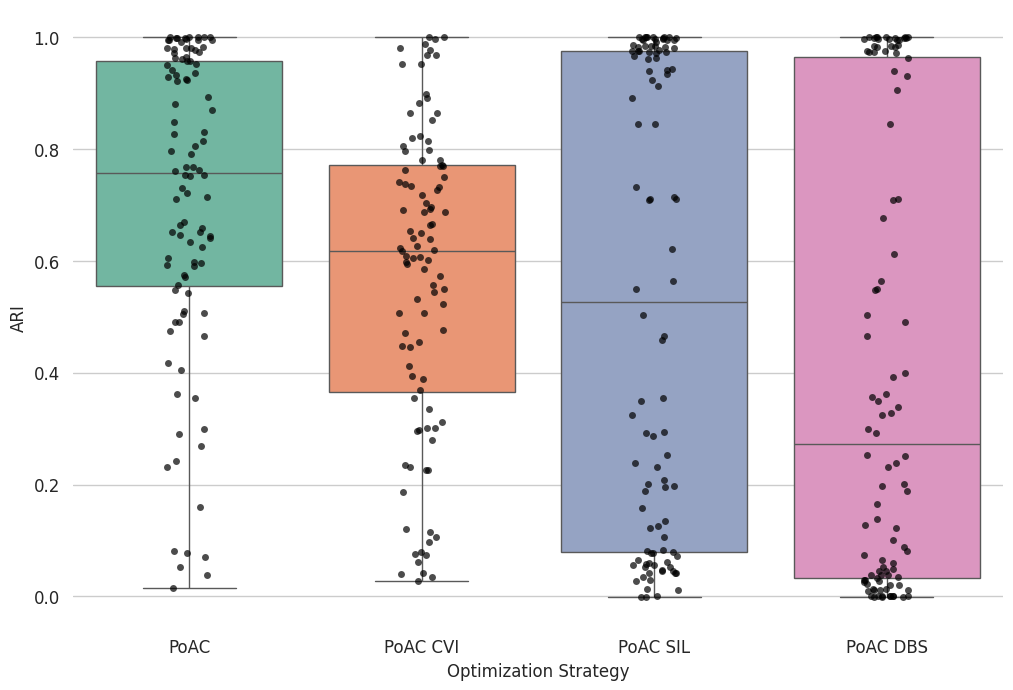

In [77]:
# TODO -- check -0.5 values for ari
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="whitegrid", context="talk")
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# Create a color palette
palette = sns.color_palette("Set2")

# Create a box plot with additional customization
plt.figure(figsize=(12, 8))
# Melt the DataFrame to long format
df_melted = pd.melt(merged_df, id_vars=['dataset'], value_vars=opt_names,
                    var_name='algorithm', value_name='ari')

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='algorithm', y='ari', data=df_melted, palette=palette)
sns.stripplot(x='algorithm', y='ari', data=df_melted, color='black', size=5, jitter=True, alpha=0.7)

# plt.title('ARI Distribution by Optimization Strategy')
plt.xlabel('Optimization Strategy')
plt.ylabel('ARI')
# Rotate x-axis labels
# plt.xticks(rotation=45)

# Adjust font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

In [51]:
heat_map_df = merged_df.copy()

parsed_columns = heat_map_df['dataset'].apply(lambda x: pd.Series(parse_input_string(x)))
heat_map_df = pd.concat([heat_map_df, parsed_columns], axis=1)
heat_map_df

,dataset,PoAC SIL,PoAC DBS,PoAC,PoAC CVI,dim,clusters,instances,overlap_min,overlap_max,aspect_ref,aspect_max_min,radius,imbalance,rep
0,dim10-clusters2-instances1500-overlap1e-06-1e-...,0.9920,1.0000,0.995392,1.000000,10,2,1500,1e-06-1e,5.0,1.5,1.0,5,1,11
1,dim10-clusters2-instances2000-overlap1e-06-1e-...,1.0000,1.0000,1.000000,0.522800,10,2,2000,1e-06-1e,5.0,5.0,1.0,1,1,11
2,dim10-clusters2-instances3500-overlap1e-06-1e-...,1.0000,1.0000,1.000000,1.000000,10,2,3500,1e-06-1e,5.0,1.5,3.0,1,2,1
3,dim10-clusters2-instances400-overlap1e-06-1e-0...,1.0000,1.0000,1.000000,0.864186,10,2,400,1e-06-1e,5.0,1.5,1.0,1,1,4
4,dim10-clusters2-instances4500-overlap1e-06-1e-...,0.9973,0.9973,0.994817,0.369300,10,2,4500,1e-06-1e,5.0,1.5,3.0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,dim71-clusters7-instances2500-overlap1e-06-1e-...,0.2386,0.2386,0.848600,0.556613,71,7,2500,1e-06-1e,5.0,1.5,3.0,1,1,2
96,dim99-clusters10-instances200-overlap1e-06-1e-...,0.1982,0.1982,0.940800,0.234950,99,10,200,1e-06-1e,5.0,3.0,3.0,3,2,3
97,dim99-clusters10-instances3500-overlap1e-06-1e...,0.2082,0.0486,0.361400,0.300640,99,10,3500,1e-06-1e,5.0,3.0,3.0,3,2,1
98,dim99-clusters15-instances450-overlap1e-06-1e-...,0.0831,0.0215,0.924600,0.187431,99,15,450,1e-06-1e,5.0,3.0,3.0,1,2,3


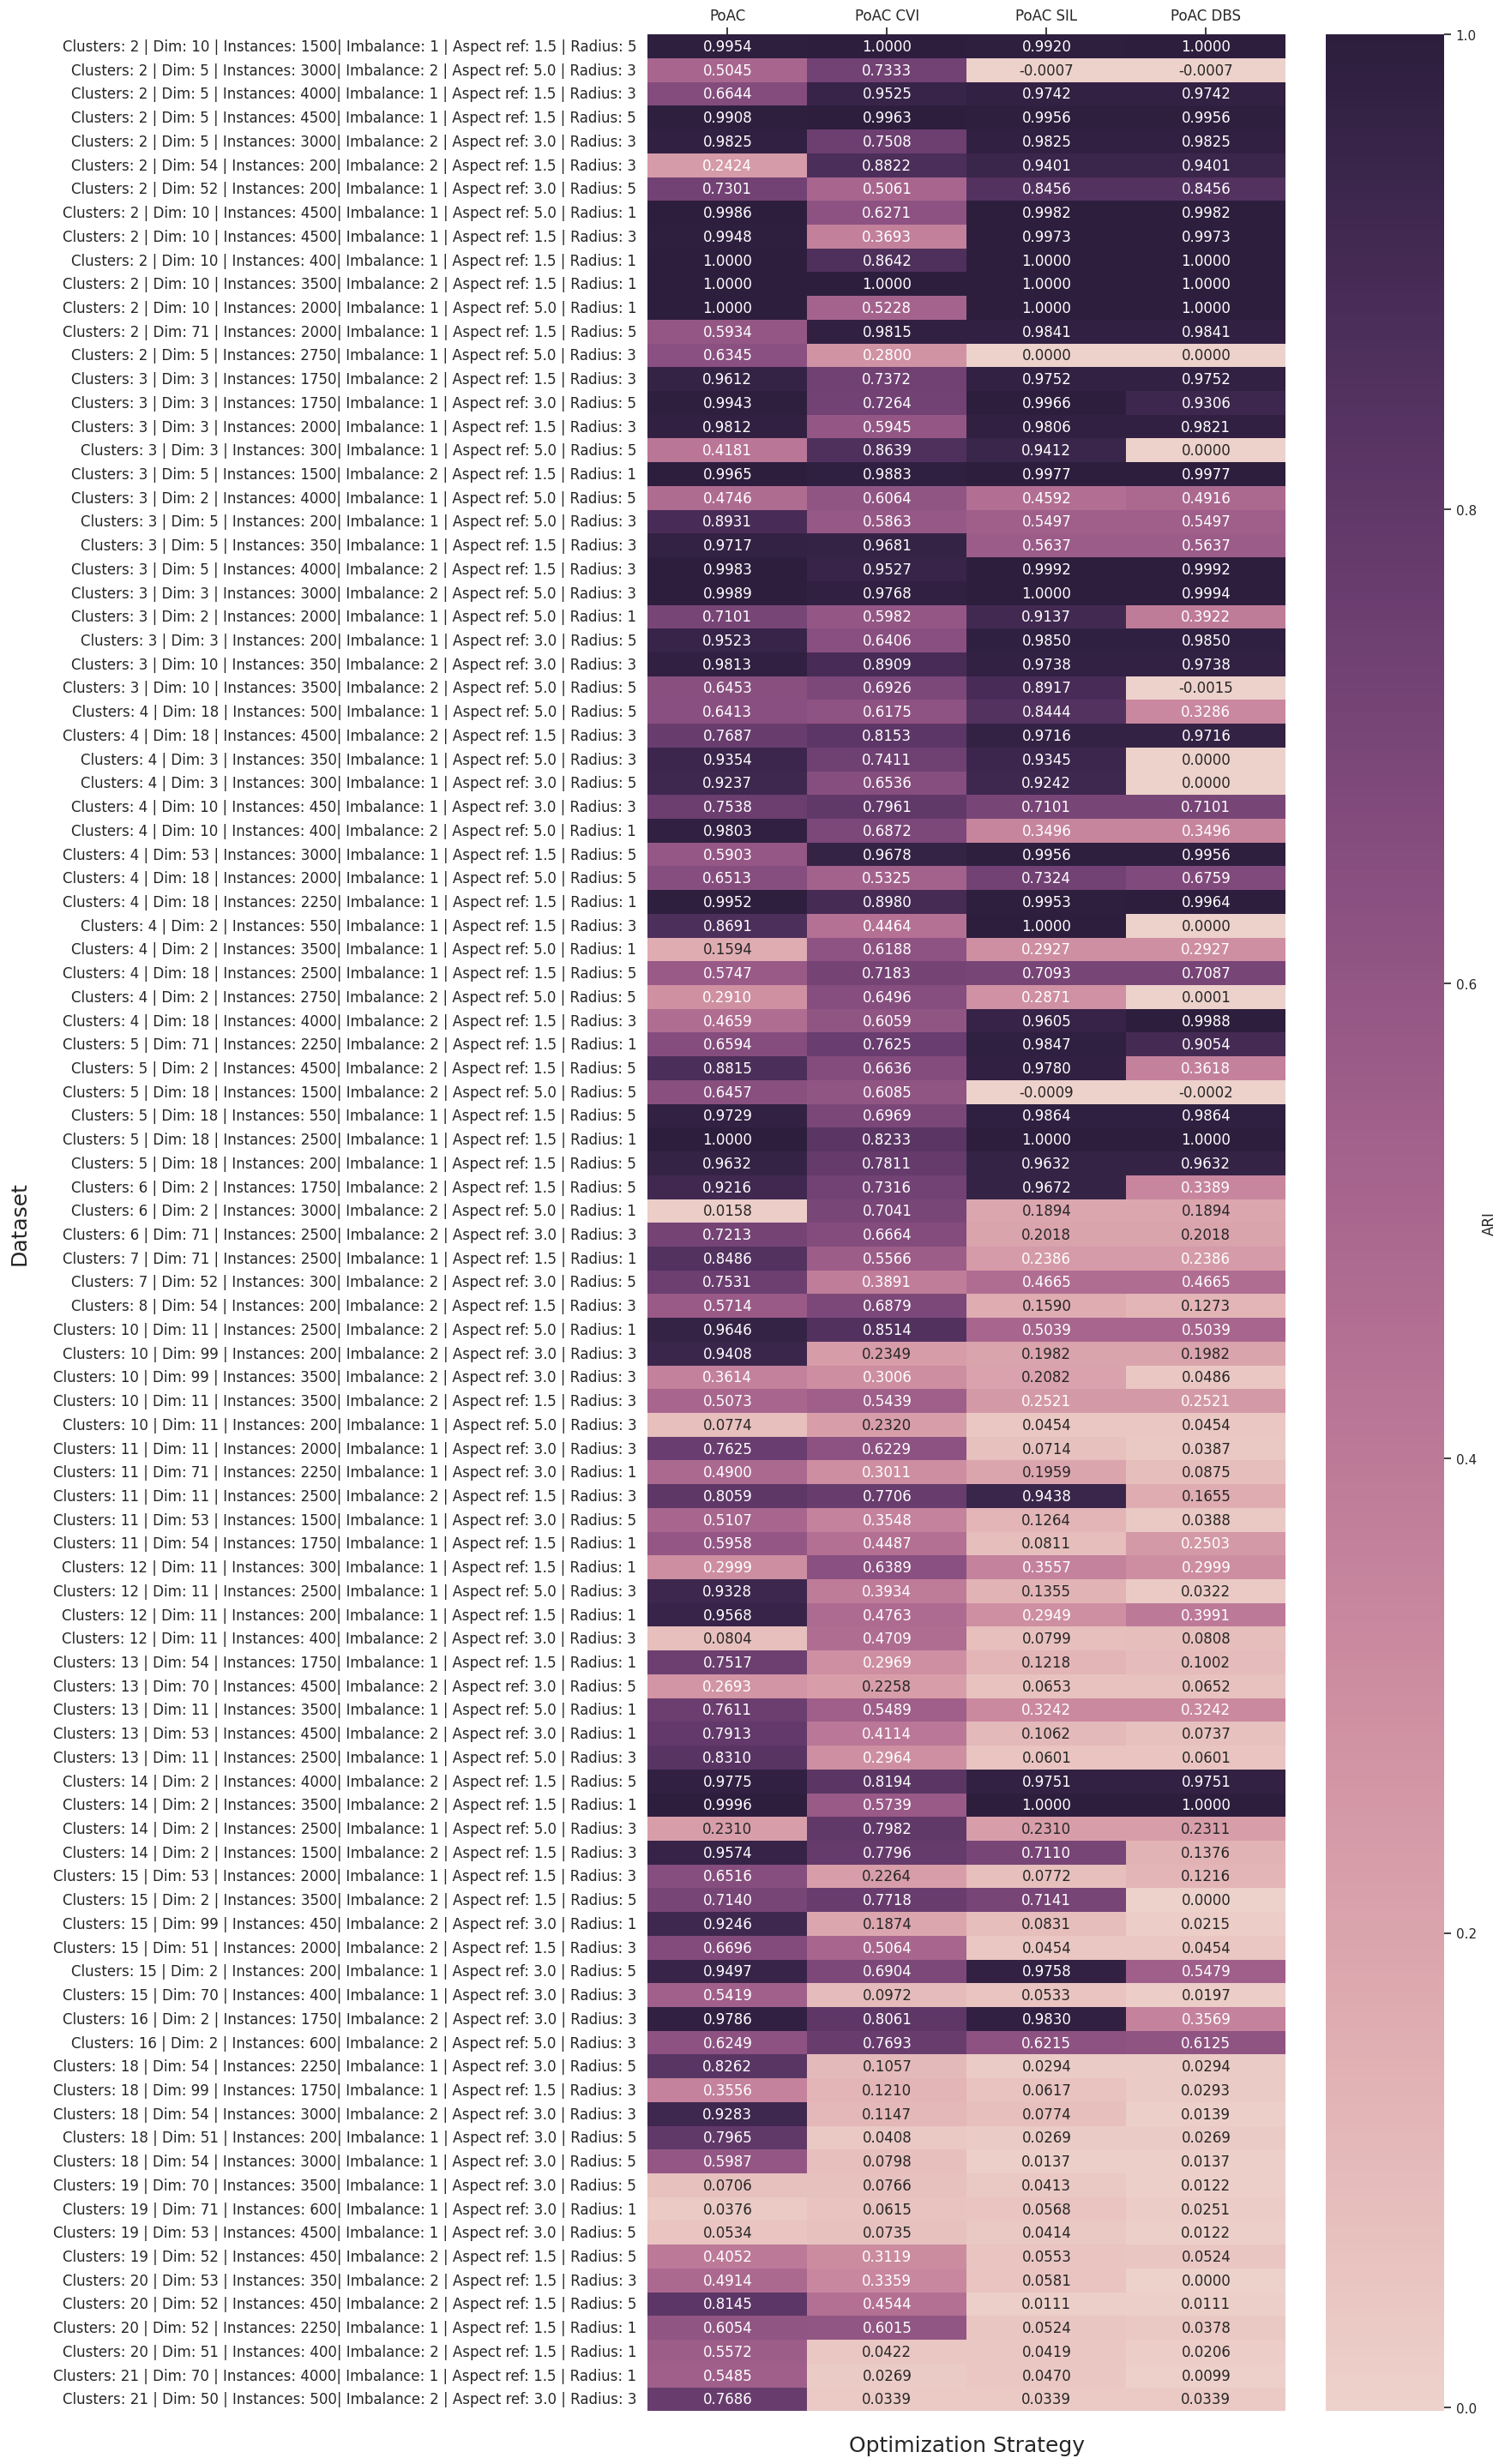

In [52]:
heat_map_df = merged_df.copy()


parsed_columns = heat_map_df['dataset'].apply(lambda x: pd.Series(parse_input_string(x)))
heat_map_df = pd.concat([heat_map_df, parsed_columns], axis=1)

heat_map_df.sort_values(by="clusters",ascending=True, inplace=True)
# heat_map_df['dataset'] = heat_map_df['dataset'].str.replace('overlap1e-06-1e-05-','').str.replace('.csv','')
heat_map_df['formated_dataset'] = heat_map_df.apply(lambda row: f"Clusters: {row['clusters']} | Dim: {row['dim']} | Instances: {row['instances']}| Imbalance: {row['imbalance']} | Aspect ref: {row['aspect_ref']} | Radius: {row['radius']}", axis=1)

heat_map_df.set_index('formated_dataset', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 36))
ax = sns.heatmap(heat_map_df[opt_names], annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar_kws={'label': 'ARI'}, fmt=".4f")

# Add titles and labels
# plt.title('ARI Values by Algorithm and Dataset', fontsize=20)
ax.set_xlabel('Optimization Strategy', fontsize=18, labelpad=20)
ax.set_ylabel('Dataset', fontsize=18, labelpad=20)

# Move x-axis label to the top
# ax.xaxis.set_label_position('top')

ax.xaxis.tick_top()

# Adjust font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [69]:
opt_names_ = opt_names.copy()
opt_names_.extend(['clusters'])
line_plot_df = heat_map_df[opt_names_]
line_plot_df.reset_index(drop=True,inplace=True)
line_plot_df

,PoAC,PoAC CVI,PoAC SIL,PoAC DBS,clusters
0,0.995392,1.000000,0.9920,1.0000,2
1,0.504490,0.733283,-0.0007,-0.0007,2
2,0.664400,0.952486,0.9742,0.9742,2
3,0.990772,0.996290,0.9956,0.9956,2
4,0.982500,0.750750,0.9825,0.9825,2
...,...,...,...,...,...
95,0.814500,0.454444,0.0111,0.0111,20
96,0.605400,0.601467,0.0524,0.0378,20
97,0.557200,0.042244,0.0419,0.0206,20
98,0.548500,0.026892,0.0470,0.0099,21


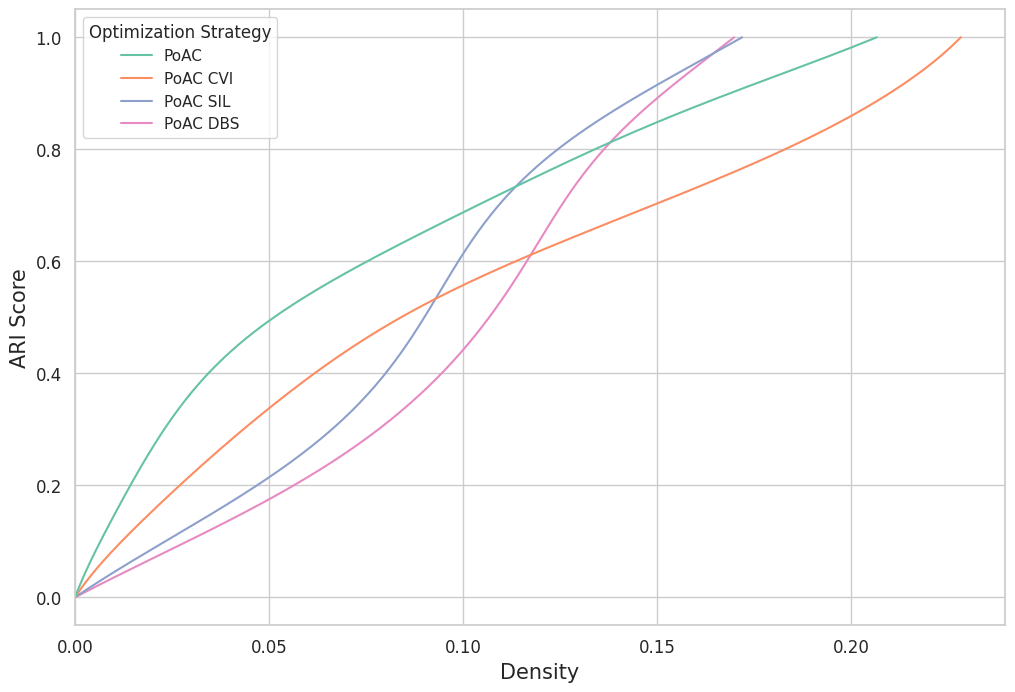

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = line_plot_df.copy()

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='clusters', value_vars=opt_names, 
                    var_name='Optimization Strategy', value_name='Value')

# Create the KDE plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_melted, y='Value', hue='Optimization Strategy', cumulative=True, multiple='layer', palette=palette, fill=False, clip=(0,1))

# Add titles and labels
# plt.title('KDE Plot of Optimization Metrics', fontsize=20)
plt.xlabel('Density', fontsize=15)
plt.ylabel('ARI Score', fontsize=15)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

df = line_plot_df.copy()

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='clusters', value_vars=['Sil Opt', 'Dbs Opt', 'Surrogate Opt'], 
                    var_name='Optimization Strategy', value_name='Value')


plt.figure(figsize=(12, 6))

# Interpolate and plot each metric
for metric in df_melted['Optimization Strategy'].unique():
    subset = df_melted[df_melted['Optimization Strategy'] == metric]
    
    # Aggregate duplicates by taking the mean
    subset = subset.groupby('clusters', as_index=False).mean()
    
    x = subset['clusters']
    y = subset['Value']
    
    # Interpolate
    x_new = np.linspace(x.min(), x.max(), 250)  # 300 points for smooth line
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_new)
    
    # Plot
    plt.plot(x_new, y_smooth, label=metric)
    # plt.scatter(x, y)  # Add original points for reference
sns.lineplot(data=df_melted, x='clusters', y='Value', hue='Optimization Strategy', ci='sd', marker='o', alpha=0.3, legend=None)

# Add titles and labels
plt.title('Optimization Strategies by Number of Clusters', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('ARI Score', fontsize=15)

# Set the x-axis limits and ticks
plt.xlim(left=4)  # Set the minimum x-tick value
plt.xticks(range(2, df['clusters'].max() + 1))  # Set custom x-ticks

# Show grid
plt.grid(True)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df = line_plot_df.copy()

# Group by 'clusters' and calculate the mean for each metric
df_mean = df.groupby('clusters').mean().reset_index()

# Define a function to interpolate and smooth the data
def smooth_data(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Melt the mean DataFrame to long format for easier plotting with Seaborn
df_mean_melted = df_mean.melt(id_vars='clusters', value_vars=['Sil Opt', 'Dbs Opt', 'Surrogate Opt'], 
                              var_name='Metric', value_name='Value')

# Plotting the smooth data with confidence intervals
plt.figure(figsize=(12, 6))

# List of metrics to plot
metrics = ['Sil Opt', 'Dbs Opt', 'Surrogate Opt']

# Plot each metric with smoothing
for metric in metrics:
    subset = df_mean_melted[df_mean_melted['Metric'] == metric]
    x_new, y_smooth = smooth_data(subset['clusters'], subset['Value'])
    plt.plot(x_new, y_smooth, label=f'{metric} (Smoothed)')

# Plot confidence intervals using seaborn lineplot
# sns.lineplot(data=df_melted, x='clusters', y='Value', hue='Metric', ci='sd', marker='o', alpha=0.3)

# Add titles and labels
plt.title('Smoothed Optimization Metrics by Number of Clusters with Confidence Intervals', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Set the x-axis limits and ticks
plt.xlim(left=4)  # Set the minimum x-tick value
plt.xticks(range(4, df['clusters'].max() + 1))  # Set custom x-ticks

# Show grid
plt.grid(True)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


---

# AS X HPO x CASH



In [10]:
def count_pipeline_steps(pipeline_string):
    # Use regular expression to find steps in the pipeline string
    matches = re.findall(r"\('(\w+)'", pipeline_string)

    # Count the number of unique steps
    num_steps = len(set(matches))

    return num_steps

In [51]:
df = validation_data.copy()
df = df[["dataset","gen","sil","dbs","ari","pipeline","surrogate_score"]]


,dataset,gen,sil,dbs,ari,pipeline,surrogate_score
0,dim11-clusters10-instances200-overlap1e-06-1e-...,0,0.2827,1.3650,0.7076,"Pipeline(steps=[('pca', PCA(n_components=10)),...",0.8685
1,dim11-clusters10-instances200-overlap1e-06-1e-...,0,0.2343,1.2424,0.6912,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",0.8720
2,dim11-clusters10-instances200-overlap1e-06-1e-...,0,0.3273,1.2346,0.7488,"Pipeline(steps=[('kmeans', KMeans())])",0.9158
3,dim11-clusters10-instances200-overlap1e-06-1e-...,0,0.3448,1.2526,0.8947,"Pipeline(steps=[('agglomerativeclustering', Ag...",0.9153
4,dim11-clusters10-instances200-overlap1e-06-1e-...,0,0.2675,1.1927,0.6878,"Pipeline(steps=[('normalizer', Normalizer(norm...",0.8801
...,...,...,...,...,...,...,...
432699,dim11-clusters12-instances400-overlap1e-06-1e-...,1,0.4490,1.0413,0.8145,"Pipeline(steps=[('minmaxscaler', MinMaxScaler(...",0.9618
432700,dim11-clusters12-instances400-overlap1e-06-1e-...,1,0.2116,1.7458,0.6701,"Pipeline(steps=[('spectralclustering', Spectra...",0.7367
432701,dim11-clusters12-instances400-overlap1e-06-1e-...,1,0.3147,1.4184,0.5533,"Pipeline(steps=[('minibatchkmeans', MiniBatchK...",0.8619
432702,dim11-clusters12-instances400-overlap1e-06-1e-...,1,0.3210,1.5789,0.7876,"Pipeline(steps=[('kmeans', KMeans(n_clusters=2...",0.8542


In [53]:
complexity_df = df.copy()
max_scores = complexity_df.loc[complexity_df.groupby('dataset')['surrogate_score'].transform(max) == complexity_df['surrogate_score']]

/tmp/ipykernel_4974/2428183408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_scores['pipeline_complexity'] = max_scores['pipeline'].apply(count_pipeline_steps)


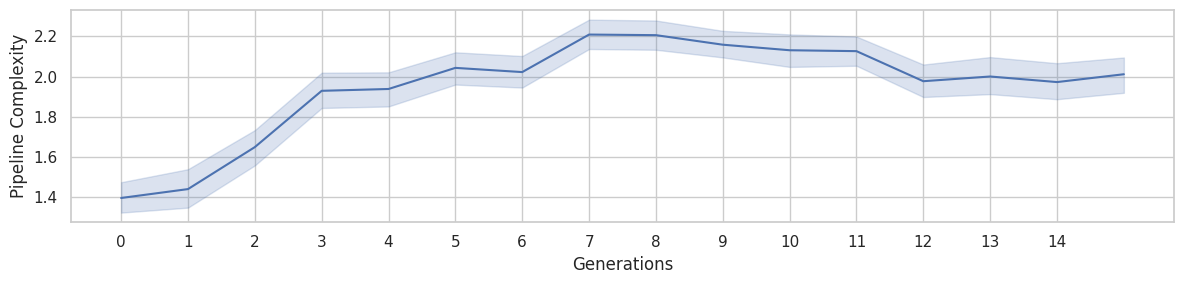

In [67]:
plt.figure(figsize=(12, 3))

max_scores['pipeline_complexity'] = max_scores['pipeline'].apply(count_pipeline_steps)
max_scores.groupby('pipeline_complexity').agg({'ari':['mean','median','count']})


axes = sns.lineplot(x='gen', y='pipeline_complexity', data=max_scores)

plt.ylabel("Pipeline Complexity")
plt.xlabel("Generations")
plt.xticks(np.arange(0,15,step=1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_4974/661534329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_scores['pipeline_complexity'] = max_scores['pipeline'].apply(count_pipeline_steps)


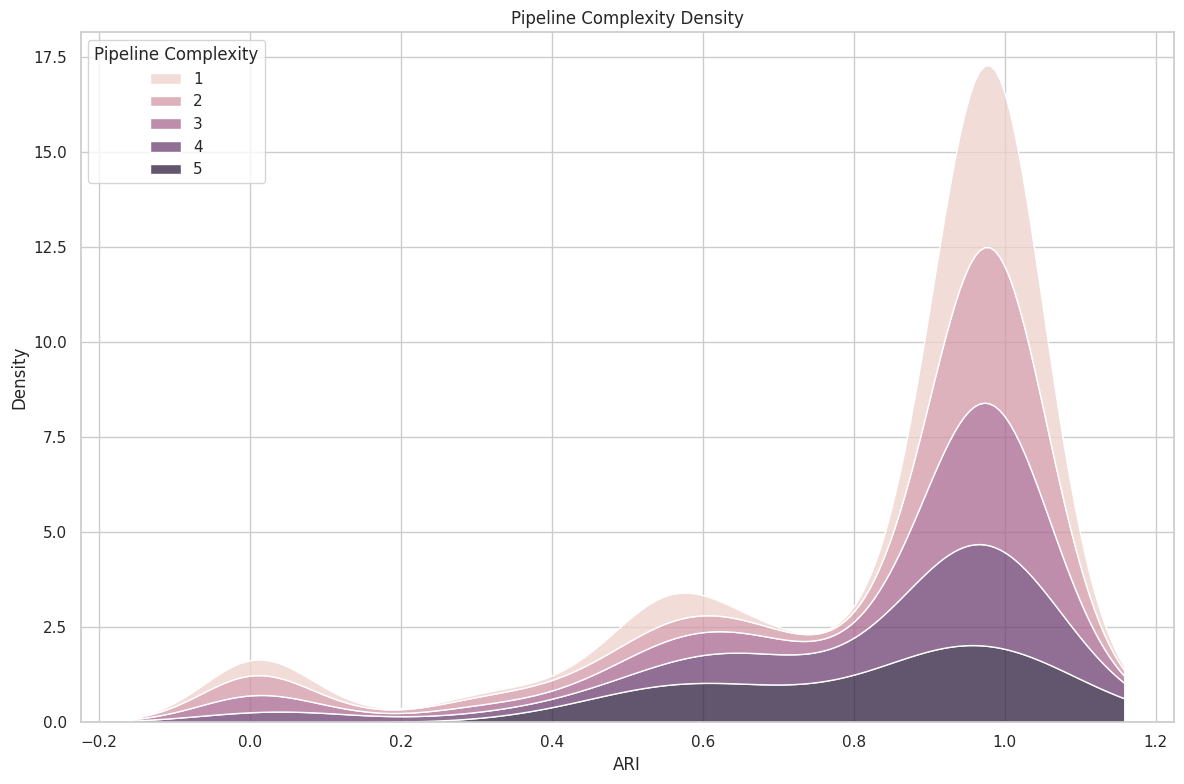

In [80]:
max_scores['pipeline_complexity'] = max_scores['pipeline'].apply(count_pipeline_steps)
# max_scores.groupby('pipeline_complexity').agg({'ari':['mean','median','count']})

# axes = sns.lineplot(x='ari', y='pipeline_complexity', data=max_scores)

# plt.ylabel("Pipeline Complexity")
# plt.xlabel("Generations")
# plt.xticks(np.arange(0,15,step=1))

plt.figure(figsize=(12, 8))
sns.kdeplot(data=max_scores, x='ari', hue='pipeline_complexity', fill=True, multiple="stack", common_norm=False).legend_.set_title("Pipeline Complexity")

plt.title('Pipeline Complexity Density')
plt.xlabel('ARI')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()